In [1]:
import awkward_pandas
import pandas as pd
import awkward as ak

In [2]:
ds = ak.from_parquet("muons")

In [3]:
ds.show(limit_rows=10, limit_cols=140)

[{run: 1, luminosityBlock: 13, event: 1201, MET: {pt: 19.5, phi: 3.1}, muons: [], gen: [{pt: 60.4, ...}, ...]},
 {run: 1, luminosityBlock: 13, event: 1202, MET: {pt: 20.4, phi: -2.18}, muons: [{pt: 18.6, ...}, ...], gen: [{...}, ...]},
 {run: 1, luminosityBlock: 13, event: 1203, MET: {pt: 28.8, phi: 2.62}, muons: [], gen: [{pt: 40.6, ...}]},
 {run: 1, luminosityBlock: 13, event: 1204, MET: {pt: 4.42, phi: -0.206}, muons: [{pt: 26.7, ...}, ...], gen: [{...}, ...]},
 {run: 1, luminosityBlock: 13, event: 1205, MET: {pt: 5.86, phi: 2.47}, muons: [{pt: 7.62, eta: ..., ...}], gen: [...]},
 ...,
 {run: 1, luminosityBlock: 2801, event: 80097, MET: {pt: 17.6, phi: 2.15}, muons: [], gen: [{pt: 24, ...}, ...]},
 {run: 1, luminosityBlock: 2801, event: 80098, MET: {pt: 15.5, phi: 0.718}, muons: [{pt: 18.6, ...}, ...], gen: [...]},
 {run: 1, luminosityBlock: 2801, event: 80099, MET: {pt: 16.2, phi: -0.555}, muons: [{pt: 26.1, ...}, ...], gen: [...]},
 {run: 1, luminosityBlock: 2801, event: 80100, ME

In [4]:
s = awkward_pandas.from_awkward(ds, name="nested")

![](muons_dataset1.svg)

In [5]:
s

0         {'run': 1, 'luminosityBlock': 13, 'event': 120...
1         {'run': 1, 'luminosityBlock': 13, 'event': 120...
2         {'run': 1, 'luminosityBlock': 13, 'event': 120...
3         {'run': 1, 'luminosityBlock': 13, 'event': 120...
4         {'run': 1, 'luminosityBlock': 13, 'event': 120...
                                ...                        
299678    {'run': 1, 'luminosityBlock': 2801, 'event': 8...
299679    {'run': 1, 'luminosityBlock': 2801, 'event': 8...
299680    {'run': 1, 'luminosityBlock': 2801, 'event': 8...
299681    {'run': 1, 'luminosityBlock': 2801, 'event': 8...
299682    {'run': 1, 'luminosityBlock': 2801, 'event': 8...
Name: nested, Length: 299683, dtype: awkward

We can "unroll" the Series into a DataFrame by extracting columns that are primitive types (e.g. Series of ints or floats). We do this with the awkward accessor (`.ak` on the Series). In the accessor we have a `to_columns` method:

In [6]:
df = s.ak.to_columns()

![](muons_dataset_df.svg)

In [7]:
df

,run,luminosityBlock,event,nested
0,1,13,1201,"{'MET': {'pt': 19.49629020690918, 'phi': 3.096..."
1,1,13,1202,"{'MET': {'pt': 20.397918701171875, 'phi': -2.1..."
2,1,13,1203,"{'MET': {'pt': 28.81757164001465, 'phi': 2.616..."
3,1,13,1204,"{'MET': {'pt': 4.415469169616699, 'phi': -0.20..."
4,1,13,1205,"{'MET': {'pt': 5.85665225982666, 'phi': 2.4723..."
...,...,...,...,...
299678,1,2801,80096,"{'MET': {'pt': 13.942445755004883, 'phi': -0.2..."
299679,1,2801,80097,"{'MET': {'pt': 17.55270004272461, 'phi': 2.154..."
299680,1,2801,80098,"{'MET': {'pt': 15.480612754821777, 'phi': 0.71..."
299681,1,2801,80099,"{'MET': {'pt': 16.163414001464844, 'phi': -0.5..."


In [8]:
df.luminosityBlock

0           13
1           13
2           13
3           13
4           13
          ... 
299678    2801
299679    2801
299680    2801
299681    2801
299682    2801
Name: luminosityBlock, Length: 299683, dtype: int64

In [10]:
df.nested.values._data

<Array [{MET: {...}, muons: [], ...}, ...] type='299683 * {MET: {pt: float6...'>

In [11]:
muons_series = df.nested.ak["muons"]

In [12]:
muons_series

0                                                        []
1         [{'pt': 18.583789825439453, 'eta': -0.17873963...
2                                                        []
3         [{'pt': 26.678863525390625, 'eta': -1.23002457...
4         [{'pt': 7.621268272399902, 'eta': 2.1535851955...
                                ...                        
299678    [{'pt': 5.740289211273193, 'eta': -1.979136943...
299679                                                   []
299680    [{'pt': 18.630128860473633, 'eta': 0.646761536...
299681    [{'pt': 26.122941970825195, 'eta': -1.98191392...
299682    [{'pt': 30.407604217529297, 'eta': 1.319252133...
Length: 299683, dtype: awkward

In [13]:
n_muons_list = [len(x) for x in muons_series]

In awkward-pandas world we have access to functions from the awkward-array API:

In [14]:
n_muons_series = muons_series.ak.num(axis=1)

Huge performance improvement with compiled awkward code over Python iteration!

In [15]:
n_muons_list == n_muons_series.tolist()

True

And we can use the results with other pandas analysis workflows...

In [16]:
n_muons_series

0         0
1         2
2         0
3         3
4         1
         ..
299678    2
299679    0
299680    2
299681    3
299682    4
Length: 299683, dtype: int64

In [17]:
df["n_muons"] = n_muons_series

In [18]:
df

,run,luminosityBlock,event,nested,n_muons
0,1,13,1201,"{'MET': {'pt': 19.49629020690918, 'phi': 3.096...",0
1,1,13,1202,"{'MET': {'pt': 20.397918701171875, 'phi': -2.1...",2
2,1,13,1203,"{'MET': {'pt': 28.81757164001465, 'phi': 2.616...",0
3,1,13,1204,"{'MET': {'pt': 4.415469169616699, 'phi': -0.20...",3
4,1,13,1205,"{'MET': {'pt': 5.85665225982666, 'phi': 2.4723...",1
...,...,...,...,...,...
299678,1,2801,80096,"{'MET': {'pt': 13.942445755004883, 'phi': -0.2...",2
299679,1,2801,80097,"{'MET': {'pt': 17.55270004272461, 'phi': 2.154...",0
299680,1,2801,80098,"{'MET': {'pt': 15.480612754821777, 'phi': 0.71...",2
299681,1,2801,80099,"{'MET': {'pt': 16.163414001464844, 'phi': -0.5...",3


In [19]:
df.query("n_muons == 2")

,run,luminosityBlock,event,nested,n_muons
1,1,13,1202,"{'MET': {'pt': 20.397918701171875, 'phi': -2.1...",2
9,1,13,1210,"{'MET': {'pt': 23.15256118774414, 'phi': -1.34...",2
10,1,13,1211,"{'MET': {'pt': 8.993561744689941, 'phi': -0.69...",2
15,1,13,1216,"{'MET': {'pt': 13.729865074157715, 'phi': -2.4...",2
16,1,13,1217,"{'MET': {'pt': 26.599597930908203, 'phi': -1.7...",2
...,...,...,...,...,...
299672,1,2801,80090,"{'MET': {'pt': 6.853196620941162, 'phi': 2.216...",2
299674,1,2801,80092,"{'MET': {'pt': 2.984848737716675, 'phi': -2.55...",2
299675,1,2801,80093,"{'MET': {'pt': 26.48899269104004, 'phi': -1.61...",2
299678,1,2801,80096,"{'MET': {'pt': 13.942445755004883, 'phi': -0.2...",2


In [20]:
df = df.query("n_muons == 2")

<AxesSubplot: >

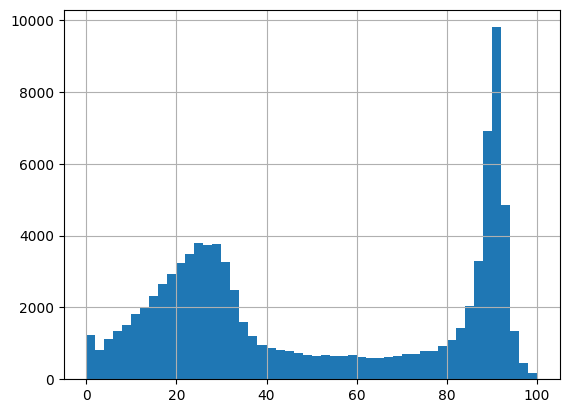

In [21]:
def inv_mass(array):
    mu1 = array.muons[:, 0]
    mu2 = array.muons[:, 1]
    return np.sqrt(2*mu1.pt*mu2.pt*(np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi)))

df.nested.ak.apply(inv_mass).hist(bins=50, range=(0, 100))